## Outlier detection using zscore 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
from matplotlib import pyplot as plt

(array([  23.,  218.,  926., 1906., 2196., 2167., 1612.,  765.,  163.,
          24.]),
 array([54.26313333, 56.73669423, 59.21025513, 61.68381603, 64.15737693,
        66.63093784, 69.10449874, 71.57805964, 74.05162054, 76.52518144,
        78.99874235]),
 <BarContainer object of 10 artists>)

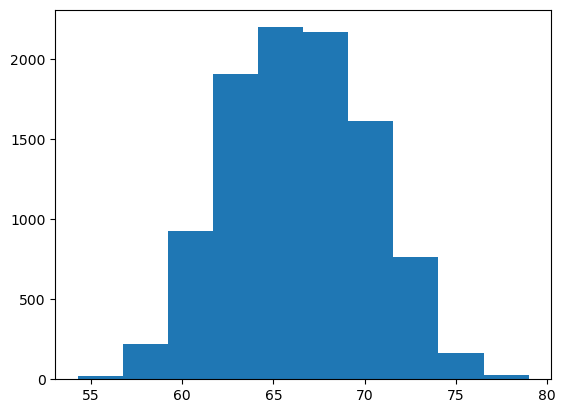

In [5]:
plt.hist(df.Height)

(array([  15.,  278., 1241., 2175., 1849., 2016., 1747.,  598.,   71.,
          10.]),
 array([ 64.70012671,  85.22908389, 105.75804107, 126.28699825,
        146.81595543, 167.34491261, 187.87386979, 208.40282697,
        228.93178415, 249.46074133, 269.98969851]),
 <BarContainer object of 10 artists>)

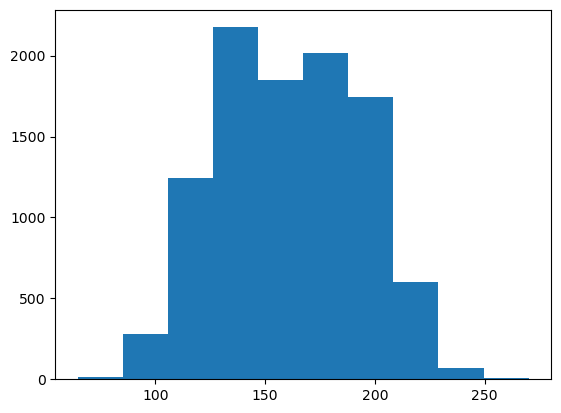

In [8]:
plt.hist(df.Weight)

In [7]:
df.describe() # we can find mean,std,min,max at one time other wise we can aslo find one by one 

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
df.Height.mean()

66.36755975482124

In [10]:
df.Height.std()

3.8475281207732324

In [11]:
up = df.Height.mean()+3*df.Height.std()

In [12]:
up

77.91014411714094

In [13]:
li = df.Height.mean()-3*df.Height.std()

In [15]:
li

54.82497539250154

In [16]:
new_df = df[~((df.Height>up)|(df.Height<li))]

In [17]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


(array([   8.,   32.,   71.,  164.,  313.,  574.,  797.,  919., 1013.,
        1002., 1006., 1025.,  930.,  727.,  632.,  388.,  225.,  104.,
          37.,   26.]),
 array([54.87372753, 56.00740047, 57.14107341, 58.27474635, 59.40841929,
        60.54209223, 61.67576517, 62.80943811, 63.94311106, 65.076784  ,
        66.21045694, 67.34412988, 68.47780282, 69.61147576, 70.7451487 ,
        71.87882164, 73.01249458, 74.14616752, 75.27984046, 76.4135134 ,
        77.54718634]),
 <BarContainer object of 20 artists>)

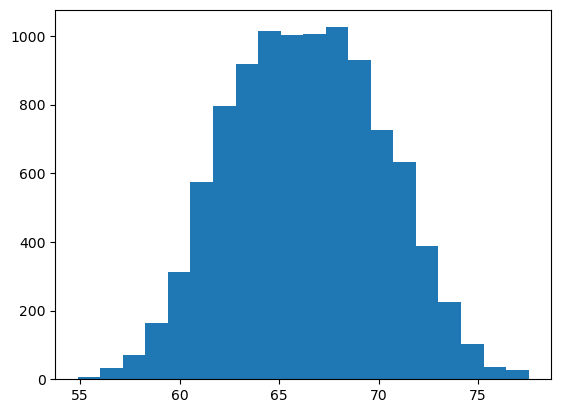

In [18]:
plt.hist(new_df.Height,bins=20)

In [21]:
new_df.to_csv('Height-Weight_processed_df.csv') # store in local drive 

 ## Z-score

In [32]:
df['new'] = df.Height*2

In [33]:
df

,Gender,Height,Weight,zscore,new
0,Male,73.847017,241.893563,1.943964,147.694034
1,Male,68.781904,162.310473,0.627505,137.563808
2,Male,74.110105,212.740856,2.012343,148.220211
3,Male,71.730978,220.042470,1.393991,143.461957
4,Male,69.881796,206.349801,0.913375,139.763592
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658,132.345304
9996,Female,67.067155,170.867906,0.181830,134.134309
9997,Female,63.867992,128.475319,-0.649655,127.735984
9998,Female,69.034243,163.852461,0.693090,138.068486


### formulae for Z score ---- z = (x-mean) / std

In [34]:
df['zscore'] = (df.Height-df.Height.mean()) / df.Height.std()

In [35]:
df

,Gender,Height,Weight,zscore,new
0,Male,73.847017,241.893563,1.943964,147.694034
1,Male,68.781904,162.310473,0.627505,137.563808
2,Male,74.110105,212.740856,2.012343,148.220211
3,Male,71.730978,220.042470,1.393991,143.461957
4,Male,69.881796,206.349801,0.913375,139.763592
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658,132.345304
9996,Female,67.067155,170.867906,0.181830,134.134309
9997,Female,63.867992,128.475319,-0.649655,127.735984
9998,Female,69.034243,163.852461,0.693090,138.068486


In [36]:
df.drop('new',axis=1,inplace=True)

In [38]:
df  ## Gender Height weight zscore

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [41]:
# cross check
# z = (x-mean) / std
z = (73.847017 - 66.36) / 3.84

In [44]:
z    ## output same as we find before zscore 

1.9497440104166652

In [45]:
df

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [46]:
df.Height.mean()

66.36755975482124

In [48]:
df[(df['zscore']>3)|(df['zscore']<-3)] ## this are outlier

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


### using impute method we will replace outlier by mean value 

In [50]:
def impute(x):
    if x> up or x<li:
        return df.Height.mean()
    else:
        return x

In [53]:
df['Height'] = df['Height'].apply(impute)  # here  what ever outlier in Hieght is there, replace by mean value 

In [52]:
df  

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [56]:
df[(df['zscore']>3)|(df['zscore']<-3)] ## replace Height value by mean value , so we reolace outlier value

,Gender,Height,Weight,zscore
994,Male,66.36756,255.690835,3.048271
1317,Male,66.36756,227.342565,3.143445
2014,Male,66.36756,269.989699,3.282934
3285,Male,66.36756,253.889004,3.160640
3757,Male,66.36756,245.733783,3.184854
6624,Female,66.36756,71.393749,-3.054091
9285,Female,66.36756,64.700127,-3.146027


In [58]:
df[~((df.Height > up) | (df.Height<li))]

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


(array([   8.,   32.,   71.,  164.,  313.,  574.,  797.,  919., 1013.,
        1002., 1013., 1025.,  930.,  727.,  632.,  388.,  225.,  104.,
          37.,   26.]),
 array([54.87372753, 56.00740047, 57.14107341, 58.27474635, 59.40841929,
        60.54209223, 61.67576517, 62.80943811, 63.94311106, 65.076784  ,
        66.21045694, 67.34412988, 68.47780282, 69.61147576, 70.7451487 ,
        71.87882164, 73.01249458, 74.14616752, 75.27984046, 76.4135134 ,
        77.54718634]),
 <BarContainer object of 20 artists>)

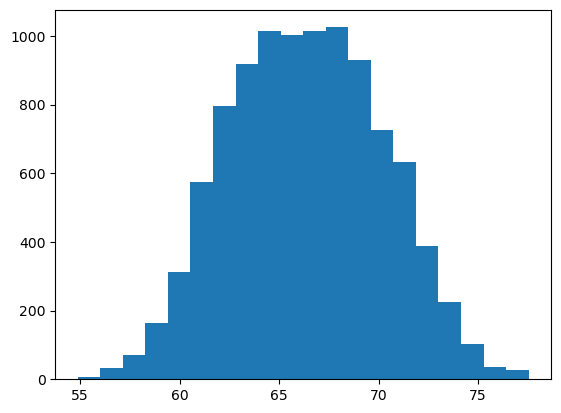

In [60]:
plt.hist(df.Height,bins= 20)

In [63]:
df['zscore'] = (df.Height - df.Height.mean()) / df.Height.std() 

In [64]:
df[(df['zscore']>3) | (df['zscore']<-3)]

,Gender,Height,Weight,zscore


## we could not find outlier becuase of impute method  